# Hvorfor er eksempelet med en railgun en veldig dårlig idè?

*Et computational essay av Karl Henrik Fredly*

Det ble nylig utgitt et essay på UiO's nettsider som skildrer hvordan en railgun kan brukes til å skyte en pakke opp til den internasjonale romstasjonen. I dette essayet ble det gjort mange grove forutsetninger og forenklinger, som til sammen gir et helt feil bilde av virkeligheten. Så før noen går ut og skader seg selv eller andre med en railgun tenkte jeg at jeg kunne sette lys på noen av grunnene til at det rett og slett ikke ville gått.

En railgun er en kanon som bruker magnetiske krefter for å akselerere et prosjektil. Den funker ved å la strøm gå langs ledere på sidene av kanonen, via prosjektilet i midten. Lederne på siden vil sette opp et magnetfelt som vil skyte prosjektilet i midten fremover siden det går en strøm gjennom det på tvers av kanon-retningen, som igjen er på tvers av magnetfelt-retningen.

Essayet jeg skal kommentere ser på hvor mye strøm som må til for å kunne skyte en pakke på 1kg helt opp til ISS, som går i bane 405km over jordas overflate. La oss begynne med å se på simuleringen for så å vise frem svakheter.

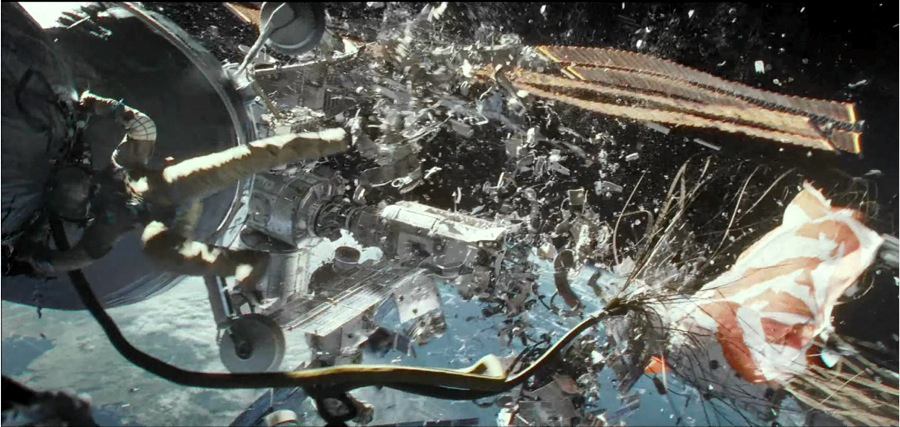

*Fra filmen Gravity (2013)*

## Resultatet fra essayet

In [1]:
import numpy as np #Utregninger
import matplotlib.pyplot as plt #Plotting

Først trenger vi konstanter som beskriver railgunen, prosjektilet og nøyaktigheten til beregningen.

In [2]:
D = .15 #separation of the rails and width of the bar. Set to 15cm
w = 0.1 #width of the rails. Set to 10cm each
L = 10 #length of the rails. Set to 10m
m = 1 #set mass to 1kg

dt=.00001 #initial timestep 0.00001s
t=0 #time starts at 0

Muover2pi = 2e-7 #magnetic constant

Hver leder på sidene vil danne et magnetfelt med styrken $$B_{rail} = \frac{\mu_0}{2 \pi}\frac{I}{r}$$

Med noen observasjoner og beregninger finner man at den magnetiske kraften som virker på prosjektilet blir $$F_{B}=2\frac{\mu_0}{2 \pi}I^2 \big(\ln(D+\frac{w}{2})-\ln(\frac{w}{2})\big)$$

Tar man den induserte strømmen i kretsen med i betraktningen finner man videre at: $$I_{induced}=-2\frac{\mu_0}{2 \pi}I \big(\ln(D+\frac{w}{2})-\ln(\frac{w}{2})\big)v$$

Til sammen kan man da finne bevegelsen inne i railgunen på følgende vis:

In [3]:
def railgun_g_induct(L,D,w,I,dt):
    posarray = np.zeros(0)
    timearray = np.zeros(0)
    v = 0
    barpos = 0
    t = 0
    
    while barpos < L:
        I = I - 2*Muover2pi*I*(np.log(D+w/2)-np.log(w/2))*v #update the current, subtracting the induced current
        Fnet = 2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2))-9.8*m
        v = v + Fnet/m*dt #Update the velocity of the bar
        barpos = barpos + v*dt #Use velocity to update position
        t = t+dt
        posarray = np.append(posarray,barpos)
        timearray = np.append(timearray,t)
    return v, posarray, timearray

Det ble funnet at det måtte en startfart på rundt 2733m/s til for å nå romstasjonen (for å nå høyden til romstasjonen på 405km når man ser bort fra luftmotstand). Videre ble det funnet at for at prosjektilet skulle nå den farten måtte det til en strøm på 1057221 ampere.

Med en strøm på 1057221 ampere når prosjektilet en fart på 2737m/s på 0.00622 sekunder.


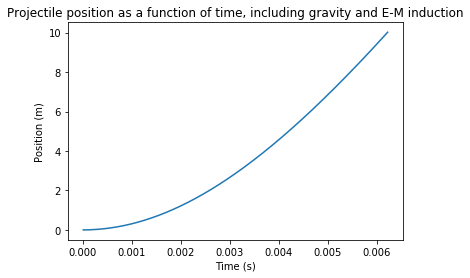

In [58]:
I = 1057221
v_test, pos_ind, time_ind = railgun_g_induct(L,D,w,I,dt)
print("Med en strøm på {:d} ampere når prosjektilet en fart på {:.0f}m/s på {:.5f} sekunder."
      .format(I, v_test, time_ind[-1]))

plt.plot(time_ind,pos_ind)
plt.title("Projectile position as a function of time, including gravity and E-M induction")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

## Friksjon

Før pakken i det hele tatt er ute av railgunen vil alt håp om å nå romstasjonen være tapt. Pakken sitter inntil de to lederne på sidene, og vil derfor bli sakket ned av friksjonen fra de. En <a href="https://arxiv.org/pdf/1709.05901.pdf">forenklet modell</a> av friksjon i dette systemet sier at friksjonskraften kan tas i betraktning ved å minke akselerasjonskraften med 10%. La oss gjøre om på beregningen for å finne farten til prosjektilet når man tar friksjon i betraktning..

Med en strøm på 1057221 ampere når prosjektilet en fart på 2595m/s på 0.00655 sekunder.


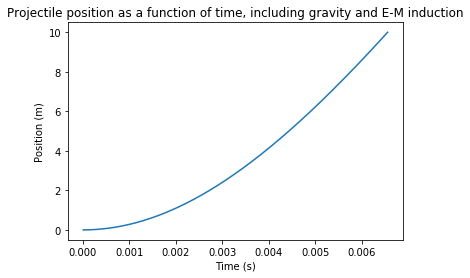

In [55]:
def railgun_g_induct_friction(L,D,w,I,dt):
    posarray = np.zeros(0)
    timearray = np.zeros(0)
    v = 0
    barpos = 0
    t = 0
    
    while barpos < L:
        I = I - 2*Muover2pi*I*(np.log(D+w/2)-np.log(w/2))*v
        Fnet = (2*Muover2pi*(I**2)*(np.log(D+w/2)-np.log(w/2))) * 0.9 - 9.8 * m #Redusert akselerasjonskraft
        v = v + Fnet/m*dt
        barpos = barpos + v*dt
        t = t+dt
        posarray = np.append(posarray,barpos)
        timearray = np.append(timearray,t)
    return v, posarray, timearray

I = 1057221 #Samme strøm
v2_test, pos2_ind, time2_ind = railgun_g_induct_friction(L,D,w,I,dt)
print("Med en strøm på {:d} ampere når prosjektilet en fart på {:.0f}m/s på {:.5f} sekunder."
      .format(I, v2_test, time2_ind[-1]))

plt.plot(time2_ind,pos2_ind)
plt.title("Projectile position as a function of time, including gravity and E-M induction")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

In [54]:
print(v_test - v2_test)

141.63175633951278


Og bare med det mangler vi 141m/s for å kunne når romstasjonen. Men dette er ikke så veldig mye. Det kan tenkes at man bare kjører på med en høyere strøm, og fortsatt når romstasjonen. Dette stemmer nok i mange tilfeller, men friksjon er bare en del av problemet.

## Energitap

Når det går strøm gjennom en leder med resistans, vil noe av energien i kretsen gå over til varmeenergi. Formelen for dette energitapet er $$\Delta P = I^2R$$

Med forutsetningen at $R = 1\Omega$ får vi da:

$$\Delta P = I^2R = 1057221^2 * 1 = 1.12 * 10^{12}$$

Dette er energi som også vil koste noe når det gjelder hastigheten prosjektilet når, som igjen vil føre til at det ikke når nødvendig høyt opp. Men det større problemet er at all den varmen vil skade railgunen og prosjektilet.

Men så sier man kanskje at dette er hvordan en railgun fungerer, og at folk har fikset dette før. "Lag den av matrealer som tåler litt varme og skyt opp om vinteren". Men det er viktig å ta dette på alvor. Det at kanonen ødelegger seg selv er et av de store problemene med utviklingen av railgun teknologi.

## Andre Magnetiske Krefter

Det fører oss videre til mitt neste punkt. Magnetfeltet fra lederne vil ikke bare få prosjektilet til å fly fremover, det vil også utføre en enorm kraft på lederne selv. Den ene lederen vil danne et magnetfelt som vil påføre en kraft på den andre. Denne kraften vil pekke utover fra midten. Fra tidligere har vi at magnetfeltet fra leder nr. 1 er (situasjonen vil være lik for begge):

$$B_{1} = \frac{\mu_0}{2 \pi}\frac{I_1}{r}$$

Da blir kraften på leder nr.2 lik:

$$F_{2} = I_2LB_1 = I_2L\frac{\mu_0}{2 \pi}\frac{I_1}{r}$$

Vi vil gjerne sleppe å ta lengden i betraktning, og heller late som om begge lederne er uendelig lange. I en slik situasjon kan vi finne akselerasjonen på lederne ved å bruke massetettheten deres. La oss bare bruke massetettheten til jern som et eksempel. Jern har en massetetthet på 7874 kg/m^3. Siden lederne er 0.1m breie, har de et kryssareal på 0.01m^2. Da ser vi at lederne vil veie 78.74kg per meter. Setter $\rho = 78.74kg/m$.

Akselerasjon er lik F/m, så vi får at:

$$a_2 = \frac{F_{2}}{m_2} = \frac{F_{2}}{L \rho} = I_1 I_2\frac{\mu_0}{2 \pi r} \frac{L}{L \rho}
 = I_1 I_2\frac{\mu_0}{2 \pi r \rho}$$

In [59]:
I1 = I
I2 = I
rho = 78.74

def akselerasjonUt(r):
    return I1 * I2 * Muover2pi / (rho * r)

Nå som vi har en funksjon for akselerasjonen til lederne ut fra midten har vi alt vi trenger for å beregne hvordan de vil bevege seg over tid.

8941729.942728


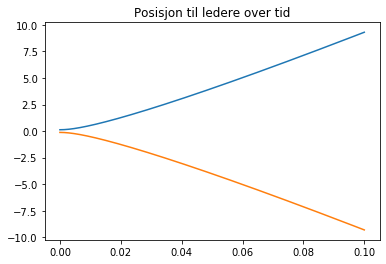

In [67]:
bn = 1000  #The number of steps in the Euler-Cromer calculation
bdt = 0.0001 #The size of each time-step in the Euler-Cromer calculation

bar1pos = np.zeros(bn) #Height in meters
bar1vel = np.zeros(bn) #Velocity in m/s
bar1acc = np.zeros(bn) #Acceleration in m/s^2

bar2pos = np.zeros(bn)
bar2vel = np.zeros(bn)
bar2acc = np.zeros(bn)

time = np.linspace(0, bn*bdt, bn)

bar1pos[0] = (D + w)/2 #Startposisjon for leder nr.1
bar2pos[0] = -(D + w)/2 #Startposisjon for leder nr.2

for i in range(bn-1):
    accel = dyttUt(bar1pos[i] - bar2pos[i])
    bar1acc[i] = accel
    bar1vel[i+1] = bar1vel[i] + bar1acc[i]*bdt
    bar1pos[i+1] = bar1pos[i] + bar1vel[i+1]*bdt
    bar2acc[i] = -accel
    bar2vel[i+1] = bar2vel[i] + bar2acc[i]*bdt
    bar2pos[i+1] = bar2pos[i] + bar2vel[i+1]*bdt
print(bar1acc[0]*rho*10)
    
plt.plot(time, bar1pos)
plt.plot(time, bar2pos)
plt.title("Posisjon til ledere over tid")
plt.show()

Her kan man tenke seg at etter 0.1 sekund har lederne flydd ut 10 meter til hver side, rett inn i en kollega eller andre sårbare ting. I virkeligheten ville de nok ikke flydd særlig langt ut til sidene, siden kretsen ville blitt brutt med en gang de sluttet å røre ved prosjektilet. Men bare det å holde lederne inntil prosjektilet er altså enda en veldig stor utfordring. Ikke umulig å løse, men også vanskelig.

## Luftmotstand

Hittil kan man vel tenke seg at man bare kan kompensere for energitap, friksjon og den magnetiske kraften på lederne ved riktig valg av strøm, matreale og konstruksjon. Og det kan man i mange tilfeller være nok, det finnes tross alt railgunner som fungerer.

Men å skyte en pakke på 1kg helt opp til romstasjonen får man bare ikke til. Hvorfor skal vi se på nå:

Først lager vi en funksjon for tyngdekraften som vil virke på pakken.

In [7]:
G = 6.674 * 10**(-11) #Gravitational constant
M = 5.972 * 10**24 #Mass of the Earth
R_Earth = 6.371 * 10**6 #Radius of the Earth

def gravAccel(h):
    return -G * M / (R_Earth + h)**2

Så lager vi en funskjon for luftmotstanden. <a href="https://www.engineeringtoolbox.com/drag-coefficient-d_627.html">Luftmotstands-koeffisienten</a> for en kube(pakken er formet som et prisme) vil føre til store problemer senere. Det er derfor man gjerne skyter ut ting som vil bli mindre påvirket av luftmotstand.

In [8]:
rho = 1.225
Cd = 0.8
A = D * w

def drag(v):
    return -0.5 * rho * v * abs(v) * Cd * A

Regner ut banen til prosjektilen med en startfart på 2737m/s rett oppover.

In [9]:
#These values gives us a good look at a fall from 0 to 100km
rn = 25000  #The number of steps in the Euler-Cromer calculation
rdt = 0.001 #The size of each time-step in the Euler-Cromer calculation

pos = np.zeros(rn) #Height in meters
vel = np.zeros(rn) #Velocity in m/s
acc = np.zeros(rn) #Acceleration in m/s^2

time = np.linspace(0, rn*rdt, rn)

pos[0] = 0
vel[0] = v_test

for i in range(rn-1):
    acc[i] = gravAccel(pos[i]) + drag(vel[i])/m
    vel[i+1] = vel[i] + acc[i]*rdt
    pos[i+1] = pos[i] + vel[i+1]*rdt
acc[rn-1] = gravAccel(pos[rn-1]) + drag(vel[rn-1])/m

Plotter resultatene:

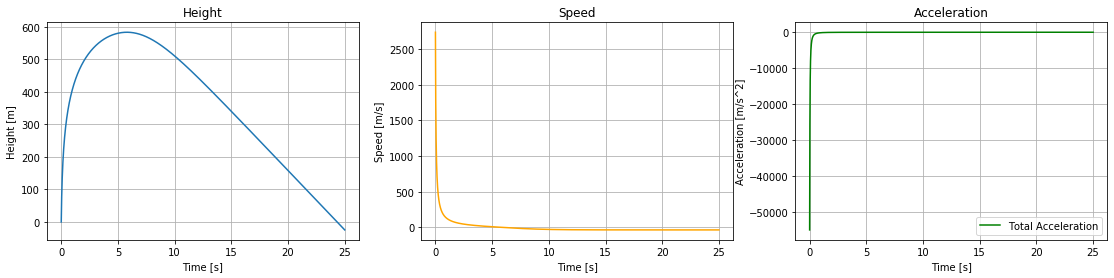

In [10]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, pos)
plt.xlabel("Time [s]")
plt.ylabel("Height [m]")
plt.title("Height")
plt.grid()

plt.subplot(132)
plt.plot(time, vel, color="orange")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.title("Speed")
plt.grid()

plt.subplot(133)
plt.plot(time, acc, color="green", label="Total Acceleration")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [m/s^2]")
plt.title("Acceleration")
plt.grid()
plt.legend()

plt.show()

Her ser vi at prosjektilet vil få en enorm negativ akselerasjon til å begynne med. Det vil bare nesten nå 600 meter, mye kortere enn målet på 405km. Dette er fordi prosjektilet er lett og har en form som fører til stor luftmotstand. Men selv med et mye tyngre og aerodymanisk prosjektil hadde det trolig ikke vært mulig å nå 405km med bare en railgun.

## Banehastighet

Men så tenker man kanskje at formlene og konstantene som blir brukt her er dårlige, og at det godt kan gjøres å nå 405km på tross av luftmotstanden. Selv om det skulle stemme, og man hadde fått skutt pakken helt opp til 405km over jordas overflate hadde man fortsatt hatt et enormt problem.

Romstasjonen går i bane rundt jorda i en hastighet på 7.66km/s. Pakken som blir skutt rett opp vil ende der oppe med en banehastighet på 0km/s. Skulle du ha vært så heldig at pakken din kom fram til romstasjonen ville det ført til en enorm kollisjon. Pakken ville effektivt ha kræsjet inn i romstasjonen i 7.66km/s. Den hadde truffet med en kinetisk energi i underkant av 30MJ. Det er omtrent som om en semitrailer på 50 tonn fløy inn i romstasjonen i 120km/t. Den hadde blitt fullstendig smadret.

## Kostnad/Konklusjon

Men da tenker man seg kanskje at romstasjonen bare kunne sakket ned noen tusen meter i sekundet, tatt imot pakken, og fått opp farta igjen. Eller at man skyter pakken opp på skrått sann at den ville hatt riktig banehasitghet, og at luftmotstant fortsatt ikke hadde vært et problem. Samtidig som man bruker matrealer som takler de enorme kreftene og temperaturene som herjer i railgunnen. Og ikke minst kompenserer med enda større strøm for å motvirke alt det som sakker ned pakken.

Men det hjelper oss fortsatt ikke med å svare på hvordan man skal betale for strømmen som railgunnen bruker!

Railgunnen vil bruke en strøm på $1057221$ ampere, og en spenning på $U = R * I = 1 * 1057221 = 1057221$ volt. Det blir da en effekt på $U * I = 1057221^2 = 1.12 * 10^{12}$ watt. Dette varte i 0.00622 sekunder, så gjør man dette om til kilowattimer får man: 
$$\frac{1.12 * 10^{12}}{1000 * 3600} * 0.00622 = 1931 \space kWh$$

Ganger man dette med prisen per kWh strøm for industri (untatt kraftintensiv industri) fra <a href="https://www.ssb.no/elkraftpris/">SSB</a>(man kan iallefall ikke kalle dette forsøket tjenesteytende), får man en pris på:
$$1931 * 38.8 = 749kr$$

Hvor skal man få pengene til dette? Skal man stjele de? Forfalske de? Forfatteren av det orginale essayet misslykkes i å ta opp disse spørsmålene, og misslykker også da med å gi et fullstendig bilde over hvorvidt det i det hele tatt er mulig å skyte en pakke til romstasjonen med en railgun.

Jeg håper at dette essayet har vært opplysende når det gjelder noen av utfordringene ved å skyte et prosjektil med en railgun.

### Kilder:

Strømpris SSB - https://www.ssb.no/elkraftpris/

Forenklet Friksjonsmodell - https://arxiv.org/pdf/1709.05901.pdf

Drag coefficient - -https://www.engineeringtoolbox.com/drag-coefficient-d_627.html